#1. Import library & Import Dataset

In [ ]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_colwidth', None)


In [ ]:
#Koneksi google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import dataset
df = pd.read_csv('drive/MyDrive/Colab Notebooks/aws/SaaS-Sales.csv',
                 parse_dates=['Order Date'])

df = df.drop(columns=['Date Key','Row ID'])

#Melihat 5 baris teratas
df.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [ ]:
#melihat tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Contact Name  9994 non-null   object        
 3   Country       9994 non-null   object        
 4   City          9994 non-null   object        
 5   Region        9994 non-null   object        
 6   Subregion     9994 non-null   object        
 7   Customer      9994 non-null   object        
 8   Customer ID   9994 non-null   int64         
 9   Industry      9994 non-null   object        
 10  Segment       9994 non-null   object        
 11  Product       9994 non-null   object        
 12  License       9994 non-null   object        
 13  Sales         9994 non-null   float64       
 14  Quantity      9994 non-null   int64         
 15  Discount      9994 non-null   float64 

#2. Data Understanding & Data Cleansing

In [ ]:
#Melihat baris & kolom dalam dataset
a,b = df.shape
print(f'Dalam dataset terdapat baris {a} dan kolom sebanyak {b}')

Dalam dataset terdapat baris 9994 dan kolom sebanyak 17


In [ ]:
#Manmbahkan kolom baru Profit Margin
df["Profit Margin"] = round((df['Profit']/df['Sales'])*100,2)

df.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Profit Margin
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,16.00
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,30.00
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,47.00
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,-40.00
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,11.25


In [ ]:
#Menampikan distribusi deskriptif statistik
display(df.describe(), df.describe(include='object'))

,Order Date,Customer ID,Sales,Quantity,Discount,Profit,Profit Margin
count,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2022-05-01 00:07:12.259355648,1049.771963,229.858001,3.789574,0.156203,28.656896,12.031390
min,2020-01-04 00:00:00,1001.000000,0.444000,1.000000,0.000000,-6599.978000,-275.000000
25%,2021-05-23 00:00:00,1024.000000,17.280000,2.000000,0.000000,1.728750,7.500000
50%,2022-06-27 00:00:00,1049.000000,54.490000,3.000000,0.200000,8.666500,27.000000
75%,2023-05-15 00:00:00,1076.000000,209.940000,5.000000,0.200000,29.364000,36.250000
max,2023-12-31 00:00:00,1101.000000,22638.480000,14.000000,0.800000,8399.976000,50.000000
std,NaN,29.719388,623.245101,2.225110,0.206452,234.260108,46.675436


,Order ID,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,37,2001,922,4219,2507,192,2127,5191,1842,1


In [ ]:
#Untuk melihat nilai unik / yg berbeda di tiap variabel
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

def unique_data(df):
  data_unique = pd.DataFrame()
  data_unique['Columns'] = df.columns
  data_unique['Unique Count'] = [df[col].nunique() for col in (df.columns)]
  data_unique['Unique'] = [df[col].unique() for col in (df.columns)]
  return data_unique

unique_data(df)

,Columns,Unique Count,Unique
0,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
1,Order Date,1237,"[2022-11-09 00:00:00, 2022-06-13 00:00:00, 2021-10-11 00:00:00, 2020-06-09 00:00:00, 2023-04-16 00:00:00, 2022-12-06 00:00:00, 2021-11-22 00:00:00, 2020-11-11 00:00:00, 2020-05-13 00:00:00, 2020-08-27 00:00:00, 2022-12-10 00:00:00, 2023-07-17 00:00:00, 2021-09-25 00:00:00, 2022-01-16 00:00:00, 2021-09-17 00:00:00, 2023-10-20 00:00:00, 2022-12-09 00:00:00, 2021-12-27 00:00:00, 2023-09-11 00:00:00, 2022-07-18 00:00:00, 2023-09-20 00:00:00, 2022-03-12 00:00:00, 2020-10-20 00:00:00, 2022-06-21 00:00:00, 2021-04-18 00:00:00, 2022-12-12 00:00:00, 2022-06-18 00:00:00, 2021-11-24 00:00:00, 2021-04-30 00:00:00, 2020-12-05 00:00:00, 2022-06-05 00:00:00, 2022-09-19 00:00:00, 2023-09-15 00:00:00, 2021-04-26 00:00:00, 2023-12-10 00:00:00, 2020-11-26 00:00:00, 2020-10-12 00:00:00, 2021-09-03 00:00:00, 2023-11-14 00:00:00, 2023-05-29 00:00:00, 2023-10-27 00:00:00, 2022-04-06 00:00:00, 2022-09-18 00:00:00, 2021-01-31 00:00:00, 2023-11-07 00:00:00, 2023-11-10 00:00:00, 2023-06-18 00:00:00, 2022-09-07 00:00:00, 2022-08-30 00:00:00, 2022-12-02 00:00:00, 2021-11-13 00:00:00, 2023-11-24 00:00:00, 2021-10-15 00:00:00, 2023-12-26 00:00:00, 2022-11-04 00:00:00, 2020-08-25 00:00:00, 2021-03-02 00:00:00, 2021-04-05 00:00:00, 2020-12-26 00:00:00, 2020-09-20 00:00:00, 2023-11-06 00:00:00, 2022-11-07 00:00:00, 2023-02-03 00:00:00, 2022-10-14 00:00:00, 2022-09-06 00:00:00, 2023-09-19 00:00:00, 2023-12-23 00:00:00, 2021-09-07 00:00:00, 2020-10-22 00:00:00, 2022-03-14 00:00:00, 2021-05-31 00:00:00, 2021-05-28 00:00:00, 2020-03-01 00:00:00, 2022-11-21 00:00:00, 2022-05-12 00:00:00, 2021-12-28 00:00:00, 2022-11-17 00:00:00, 2022-11-08 00:00:00, 2020-09-08 00:00:00, 2020-08-05 00:00:00, 2020-09-14 00:00:00, 2023-04-22 00:00:00, 2021-11-21 00:00:00, 2021-12-15 00:00:00, 2020-11-19 00:00:00, 2022-11-29 00:00:00, 2020-08-26 00:00:00, 2022-07-17 00:00:00, 2021-10-12 00:00:00, 2021-10-31 00:00:00, 2020-03-21 00:00:00, 2023-07-07 00:00:00, 2023-06-25 00:00:00, 2020-08-03 00:00:00, 2023-12-18 00:00:00, 2023-06-04 00:00:00, 2023-12-02 00:00:00, 2021-02-09 00:00:00, 2021-01-02 00:00:00, 2022-10-29 00:00:00, ...]"
2,Contact Name,793,"[Nathan Bell, Deirdre Bail

In [ ]:
#Memeriksa, apakah ada nilai yang hilang atau Null Value atau kosong
missing_value = pd.DataFrame(df.isnull().sum(), columns=['Total Nilai Kosong'])
missing_value['Persentase'] = (missing_value['Total Nilai Kosong']/df.shape[0]) *100
missing_value.sort_values(by='Persentase', ascending=False).reset_index()

#apabila suatu saat ditemukan data kosong:
#1. mengganti dengan average. Done
#2. mengganti dengan replacement. Done
#3. Eliminasi / delete. Done

,index,Total Nilai Kosong,Persentase
0,Order ID,0,0.0
1,Order Date,0,0.0
2,Profit,0,0.0
3,Discount,0,0.0
4,Quantity,0,0.0
5,Sales,0,0.0
6,License,0,0.0
7,Product,0,0.0
8,Segment,0,0.0
9,Industry,0,0.0


In [ ]:
#Memeriksa duplikat data
df.duplicated().sum()

0

In [ ]:
df[df['Order ID'].duplicated()].head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Profit Margin
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.940,3,0.0,219.5820,30.00
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.368,2,0.2,2.5164,11.25
6,AMER-2020-115812,2020-06-09,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ChatBot Plugin,4SYTVM0746,7.280,4,0.0,1.9656,27.00
7,AMER-2020-115812,2020-06-09,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Site Analytics,07842ES7DY,907.152,6,0.2,90.7152,10.00
8,AMER-2020-115812,2020-06-09,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ContactMatcher,XPBOBXWXA3,18.504,3,0.2,5.7825,31.25


#3. Anomaly Detection, Outlier, & Outlier Handling

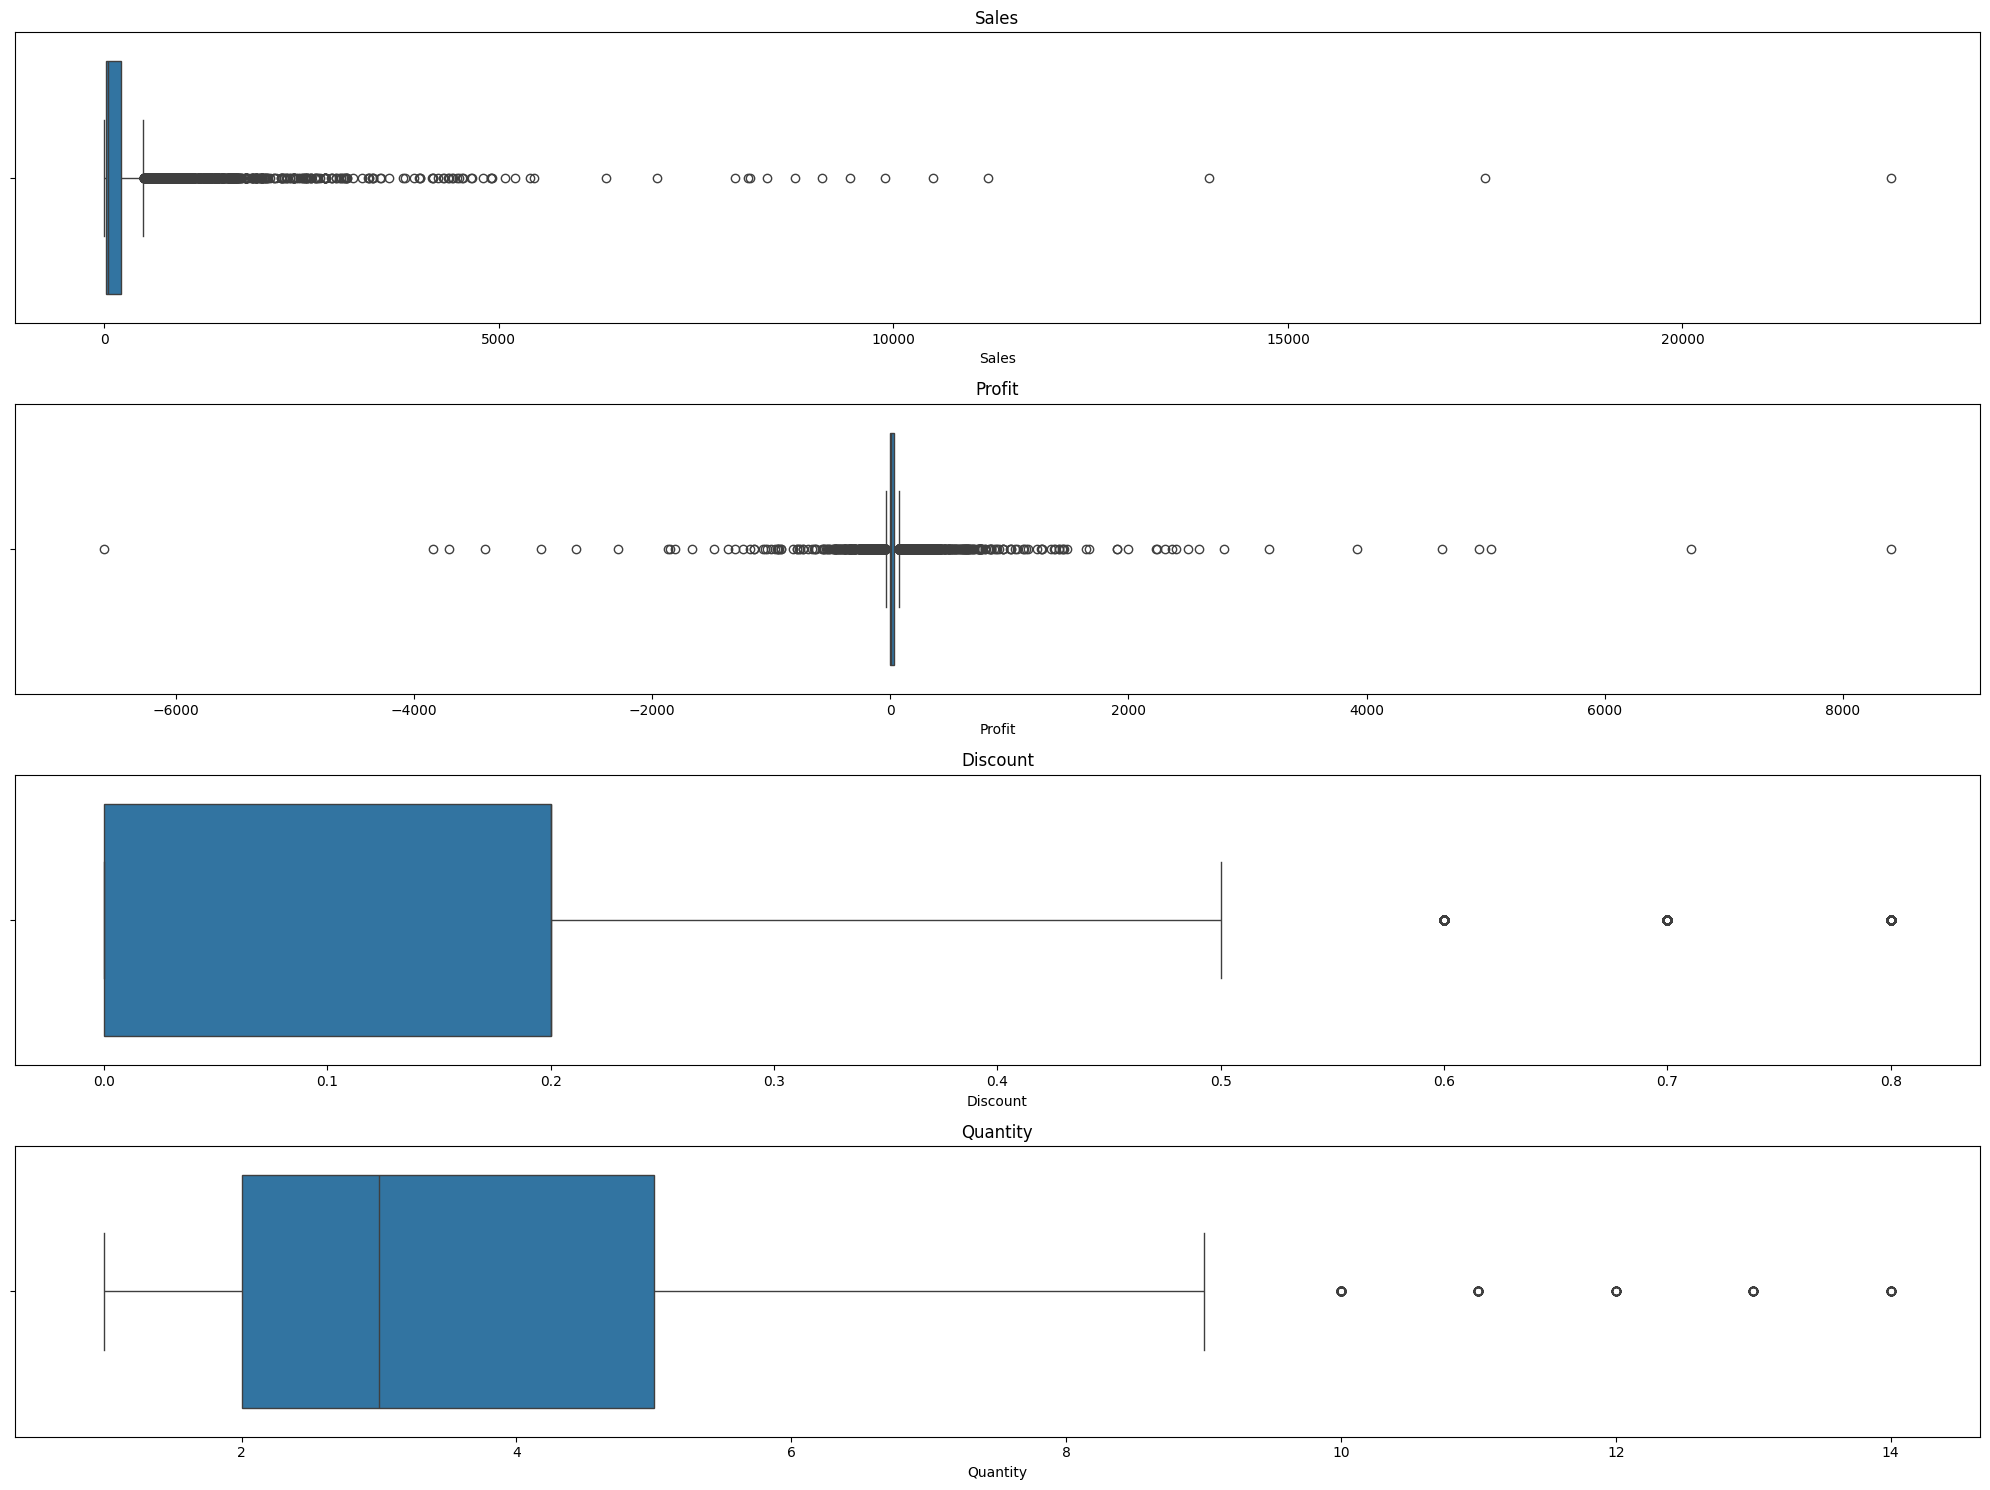

In [ ]:
#Memeriksa apakah ada outlier, kita pakai BOX POT Visualisasi
variabel = ['Sales', 'Profit', 'Discount', 'Quantity']

plt.figure(figsize=(20, 15))  #format gambar

for idx, col in enumerate(variabel, start=1):
    plt.subplot(4, 1, idx) #dimensi
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
df[['Sales','Profit','Discount','Quantity']].describe()

,Sales,Profit,Discount,Quantity
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,28.656896,0.156203,3.789574
std,623.245101,234.260108,0.206452,2.225110
min,0.444000,-6599.978000,0.000000,1.000000
25%,17.280000,1.728750,0.000000,2.000000
50%,54.490000,8.666500,0.200000,3.000000
75%,209.940000,29.364000,0.200000,5.000000
max,22638.480000,8399.976000,0.800000,14.000000


#4. Save Data ke Direktri Google Drive

In [ ]:
df.to_excel('drive/MyDrive/Colab Notebooks/aws/AWS-Sales_Cleaned.xlsx', index=False)

#5. Visualsiasi Top Down Profit Setiap produk



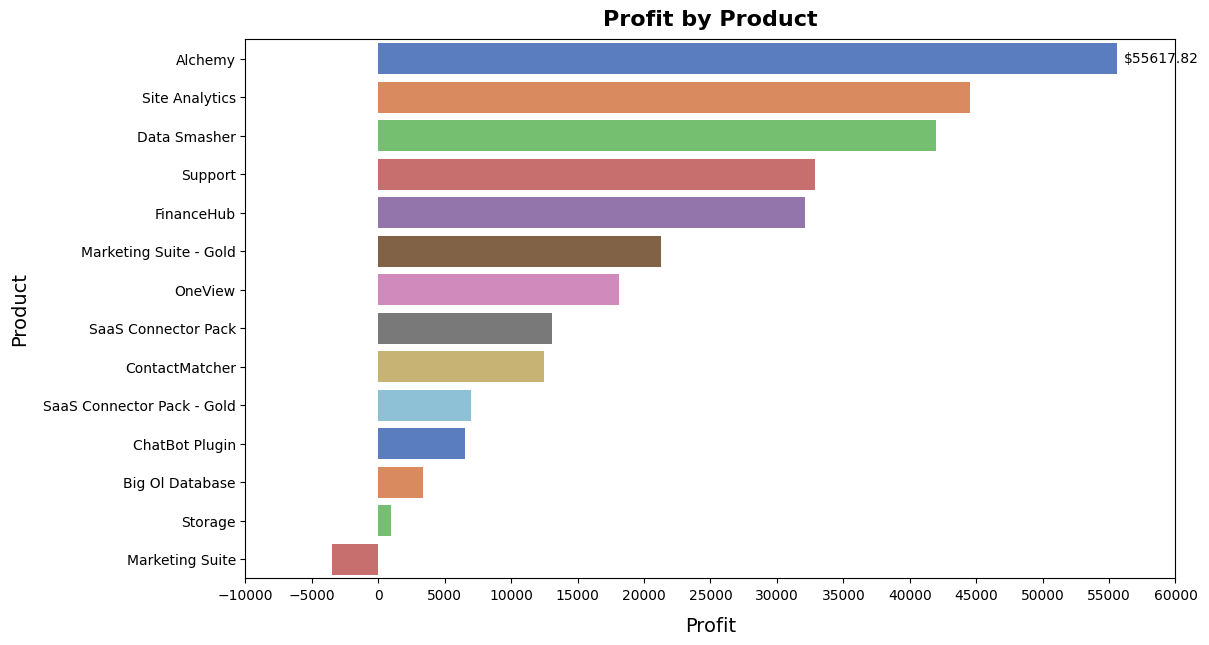

In [ ]:
#Visualisasi profit di masing-masing produk
plt.figure(figsize=(12,7))

ax = sns.barplot(
    data=df,
    y="Product",
    x="Profit",
    ci=0,
    palette='muted',
    estimator="sum",
    order=df.groupby("Product")[["Profit"]].sum().sort_values("Profit", ascending=False).index)

container = ax.containers[0]
profit_values = [f'${x:.2f}' for x in container.datavalues]
ax.bar_label(container, labels=profit_values, padding=5)

plt.title("Profit by Product", size=16, pad=10, fontweight='bold')
plt.xlabel("Profit", size=14, labelpad=10)
plt.ylabel("Product", size=14, labelpad=10)
plt.xticks(range(-10000, 65000, 5000))
plt.show()

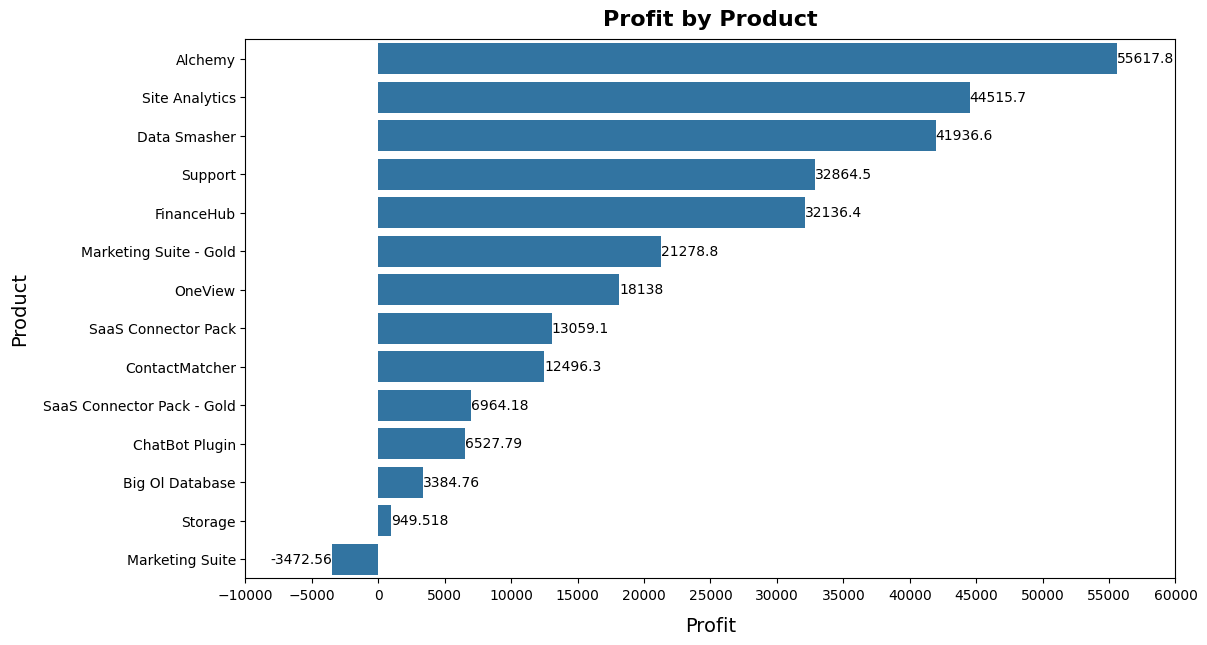

In [ ]:
#Visualisasi profit di masing-masing produk
#https://seaborn.pydata.org/tutorial/color_palettes.html
#https://seaborn.pydata.org/generated/seaborn.barplot.html

plt.figure(figsize=(12,7))

ax = sns.barplot(
    data=df,
    y="Product",
    x="Profit",
    ci=0,
    #palette='dark',
    estimator="sum",
    order=df.groupby("Product")[["Profit"]].sum().sort_values("Profit", ascending=False).index)

#container = ax.containers[0]
#profit_values = [f'${x:.2f}' for x in container.datavalues]
#ax.bar_label(container, labels=profit_values, padding=5)
ax.bar_label(ax.containers[0])

plt.title("Profit by Product", size=16, pad=10, fontweight='bold')
plt.xlabel("Profit", size=14, labelpad=10)
plt.ylabel("Product", size=14, labelpad=10)
plt.xticks(range(-10000, 65000, 5000))
plt.show()

In [ ]:
#Seleksi variabel
df_msuite = df[df['Product'] == "Marketing Suite"]
df_msuite.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Profit Margin
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,16.00
27,EMEA-2021-150630,2021-09-17,Neil Gill,France,Paris,EMEA,EU-WEST,Intel,1051,Tech,SMB,Marketing Suite,F8G07TWQ17,3083.4300,7,0.50,-1665.0522,-54.00
38,APJ-2021-117415,2021-12-27,Jasmine Metcalfe,Japan,Tokyo,APJ,JAPN,Banco Santander,1101,Finance,Enterprise,Marketing Suite,FBXEM82WEZ,532.3992,3,0.32,-46.9764,-8.82
189,EMEA-2021-102281,2021-10-12,Dylan Ogden,United Kingdom,London,EMEA,UKIR,HonHai Precision Industry,1033,Tech,Enterprise,Marketing Suite,7LL8W4OBLM,899.1360,4,0.20,112.3920,12.50
192,EMEA-2021-102281,2021-10-12,Dylan Ogden,United Kingdom,London,EMEA,UKIR,HonHai Precision Industry,1033,Tech,Enterprise,Marketing Suite,L0NREOWV2Y,626.3520,3,0.20,46.9764,7.50


#6. Correlation Analysis

In [ ]:
#Selection data
numerical_col = ['Sales','Discount','Profit','Profit Margin','Quantity']

#Memanggil visualisasi plt, berupa grafik Heat Map
correlation = df_msuite[numerical_col].corr(method = "spearman")
matriks = np.triu(correlation)
display(correlation)

,Sales,Discount,Profit,Profit Margin,Quantity
Sales,1.000000,-0.149500,0.233466,0.165776,0.617434
Discount,-0.149500,1.000000,-0.831739,-0.892099,0.144368
Profit,0.233466,-0.831739,1.000000,0.929936,-0.052914
Profit Margin,0.165776,-0.892099,0.929936,1.000000,-0.117881
Quantity,0.617434,0.144368,-0.052914,-0.117881,1.000000


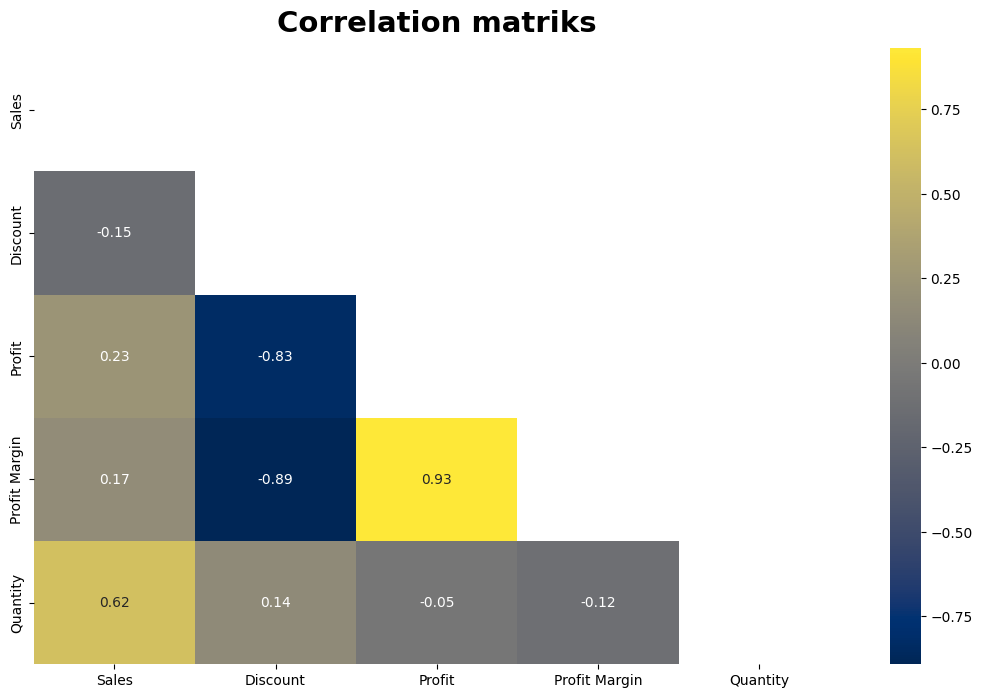

In [ ]:
plt.figure(figsize=(13,8))
sns.heatmap(
    data=correlation,
    fmt = ".2f",
    cmap = "cividis",
    annot = True,
    center = 0,
    mask = matriks
)

plt.title("Correlation matriks", size=21, pad=12, fontweight='bold')
plt.show()

In [ ]:
#Selection data
numerical_col = ["Sales", "Discount", "Profit", "Profit Margin",'Quantity']

for col in numerical_col:
    corr = df_msuite[col].corr(df["Profit"], method="spearman")

    if corr > 0:
        correlation = "positive"
        if  corr > 0.0 and corr <= 0.2:
            strength = "very weak"
        elif corr > 0.2 and corr <= 0.4:
            strength = "weak"
        elif corr > 0.4 and corr <= 0.6:
            strength = "moderate"
        elif corr > 0.6 and corr <= 0.9:
            strength = "strong"
        else:
            strength = "very strong"
    else:
        correlation = "negative"
        if corr  < 0.0 and corr >= -0.2:
            strength = "very weak"
        elif corr < -0.2 and corr >= -0.4:
            strength = "weak"
        elif corr < -0.4 and corr >= -0.6:
            strength = "moderate"
        elif corr < -0.6 and corr >= -0.9:
            strength = "strong"
        else:
            strength = "very strong"

    print(f"Nilai korelasi antara {col} dan kolom Keuntungan adalah {corr:.2f}")
    print(f"Hubungan antara {col} dan variabel Profit adalah '{correlation}' dengan kekuatan korelasi sebesar '{strength}'.")
    print()

Nilai korelasi antara Sales dan kolom Keuntungan adalah 0.23
Hubungan antara Sales dan variabel Profit adalah 'positive' dengan kekuatan korelasi sebesar 'weak'.

Nilai korelasi antara Discount dan kolom Keuntungan adalah -0.83
Hubungan antara Discount dan variabel Profit adalah 'negative' dengan kekuatan korelasi sebesar 'strong'.

Nilai korelasi antara Profit dan kolom Keuntungan adalah 1.00
Hubungan antara Profit dan variabel Profit adalah 'positive' dengan kekuatan korelasi sebesar 'very strong'.

Nilai korelasi antara Profit Margin dan kolom Keuntungan adalah 0.93
Hubungan antara Profit Margin dan variabel Profit adalah 'positive' dengan kekuatan korelasi sebesar 'very strong'.

Nilai korelasi antara Quantity dan kolom Keuntungan adalah -0.05
Hubungan antara Quantity dan variabel Profit adalah 'negative' dengan kekuatan korelasi sebesar 'very weak'.



#7. Trend SALES, PROFIT, PROFIT MARGIN, DISCOUNT

In [ ]:
#variabel untuk memastikan df-msuite
df_msuite = df_msuite.copy()
df_msuite['Order Date']=pd.to_datetime(df_msuite['Order Date'])

#Manmbahkan kolom baru Tahun dan Bulan
df_msuite["Order Month"] = (df_msuite['Order Date'].dt.to_period('M'))

df_msuite.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Profit Margin,Order Month
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,16.00,2022-11
27,EMEA-2021-150630,2021-09-17,Neil Gill,France,Paris,EMEA,EU-WEST,Intel,1051,Tech,SMB,Marketing Suite,F8G07TWQ17,3083.4300,7,0.50,-1665.0522,-54.00,2021-09
38,APJ-2021-117415,2021-12-27,Jasmine Metcalfe,Japan,Tokyo,APJ,JAPN,Banco Santander,1101,Finance,Enterprise,Marketing Suite,FBXEM82WEZ,532.3992,3,0.32,-46.9764,-8.82,2021-12
189,EMEA-2021-102281,2021-10-12,Dylan Ogden,United Kingdom,London,EMEA,UKIR,HonHai Precision Industry,1033,Tech,Enterprise,Marketing Suite,7LL8W4OBLM,899.1360,4,0.20,112.3920,12.50,2021-10
192,EMEA-2021-102281,2021-10-12,Dylan Ogden,United Kingdom,London,EMEA,UKIR,HonHai Precision Industry,1033,Tech,Enterprise,Marketing Suite,L0NREOWV2Y,626.3520,3,0.20,46.9764,7.50,2021-10


In [ ]:
df_sales = df_msuite.groupby('Order Month')[["Sales"]].mean().reset_index()
df_sales.head()

,Order Month,Sales
0,2020-01,179.847250
1,2020-02,290.666000
2,2020-03,568.815333
3,2020-04,308.499000
4,2020-05,320.315500


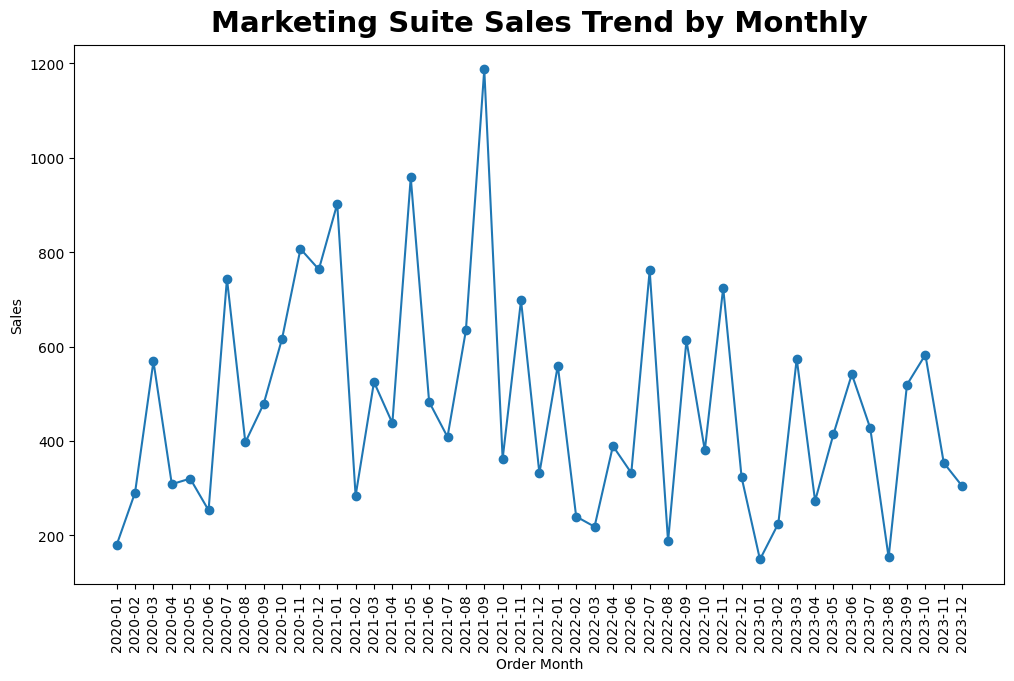

In [ ]:
plt.figure(figsize=(12,7))

sales_value=df_sales['Sales']
plt.plot(df_sales['Order Month'].astype(str), sales_value, marker='o', linestyle='-', label='Sales Trend')


plt.xlabel('Order Month')
plt.ylabel('Sales')
plt.title('Marketing Suite Sales Trend by Monthly', size=21, pad=10, fontweight='bold')
plt.xticks(rotation=90)

plt.show()

###insight :
1. Sales Fluctuation: signifiknasinya / naik turunnya pergerakan trend line chart, dari 2020 s/d 2023 bsia jadi di sebabkan oleh tren musiman, kampanye marketing, atau perubahan kondisi pasar.
2. Peak Sales: analisa puncah dimana terjadi penjualan yang tinggi
3. Lowest Sales: trens penjualan terendah selalu berada di awal tahun atau bulan januari, ini perlu diperdalam oleh manajemen perusahaan

In [ ]:
df_profit = df_msuite.groupby('Order Month')[["Profit"]].mean().reset_index()
df_profit.head()

,Order Month,Profit
0,2020-01,-82.55110
1,2020-02,3.41960
2,2020-03,-47.07500
3,2020-04,-18.14700
4,2020-05,-94.81075


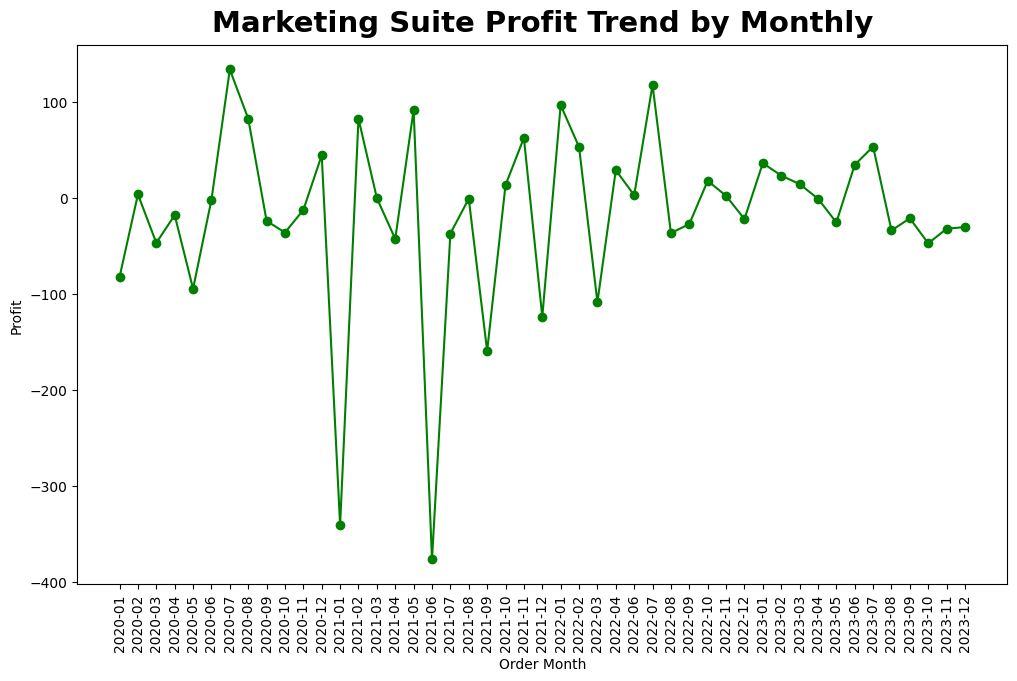

In [ ]:
plt.figure(figsize=(12,7))

profit_value=df_profit['Profit']
plt.plot(df_profit['Order Month'].astype(str), profit_value, marker='o', color='green', linestyle='-')


plt.xlabel('Order Month')
plt.ylabel('Profit')
plt.title('Marketing Suite Profit Trend by Monthly', size=21, pad=10, fontweight='bold')
plt.xticks(rotation=90)

plt.show()

###insight :
1. Profit Fluctuation: signifiknasinya / naik turunnya pergerakan trend line chart, dari 2020 s/d 2023 bsia jadi di sebabkan oleh tren musiman, kampanye marketing, atau perubahan kondisi pasar.
2. Peak Profit: analisa puncah dimana terjadi penjualan yang tinggi
3. Lowest Profit: trens penjualan terendah selalu berada di awal tahun atau bulan januari, ini perlu diperdalam oleh manajemen perusahaan

In [ ]:
df_margin = df_msuite.groupby('Order Month')[["Profit Margin"]].mean().reset_index()
df_margin.head()

,Order Month,Profit Margin
0,2020-01,-58.3725
1,2020-02,1.1800
2,2020-03,-22.0000
3,2020-04,-5.8800
4,2020-05,-26.2950


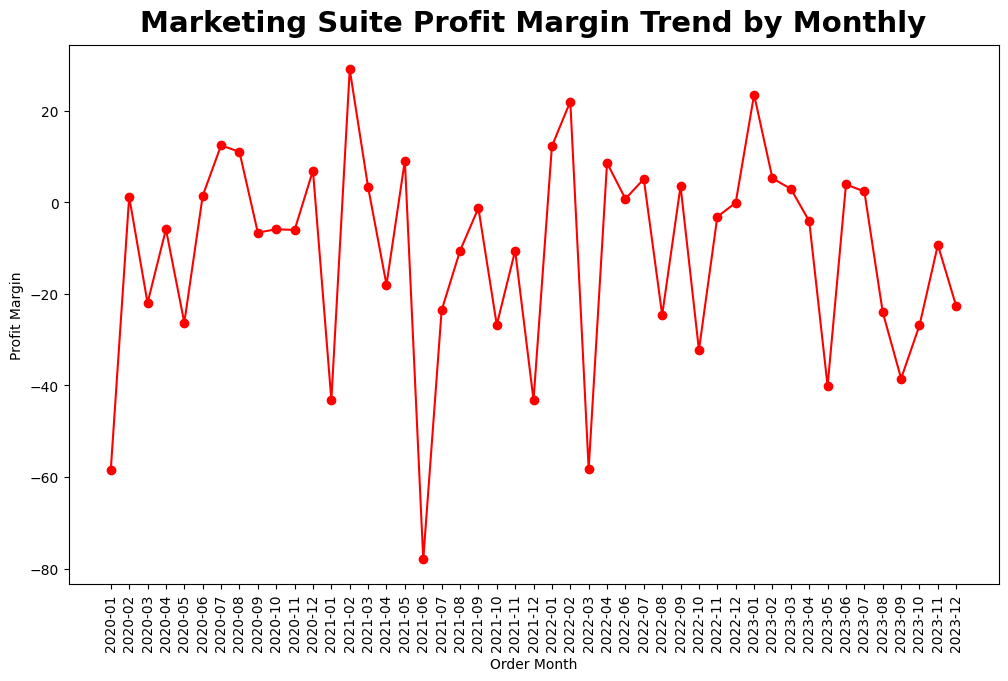

In [ ]:
plt.figure(figsize=(12,7))

margin_value=df_margin['Profit Margin']
plt.plot(df_profit['Order Month'].astype(str), margin_value, marker='o', color='red', linestyle='-')


plt.xlabel('Order Month')
plt.ylabel('Profit Margin')
plt.title('Marketing Suite Profit Margin Trend by Monthly', size=21, pad=10, fontweight='bold')
plt.xticks(rotation=90)

plt.show()

In [ ]:
df_diskon = df_msuite.groupby('Order Month')[["Discount"]].mean().reset_index()
df_diskon.head()

,Order Month,Discount
0,2020-01,0.337500
1,2020-02,0.150000
2,2020-03,0.266667
3,2020-04,0.150000
4,2020-05,0.325000


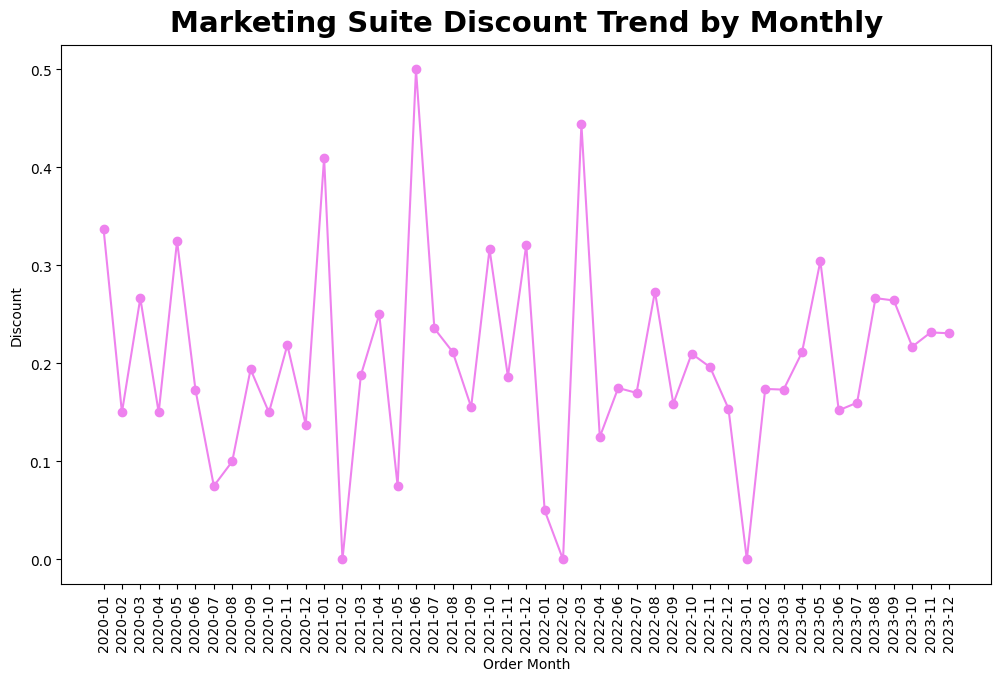

In [ ]:
plt.figure(figsize=(12,7))

diskon_value=df_diskon['Discount']
plt.plot(df_diskon['Order Month'].astype(str), diskon_value, marker='o', color='violet', linestyle='-')


plt.xlabel('Order Month')
plt.ylabel('Discount')
plt.title('Marketing Suite Discount Trend by Monthly', size=21, pad=10, fontweight='bold')
plt.xticks(rotation=90)

plt.show()

In [ ]:
df_city = df_msuite.groupby('City')[["Profit"]].sum().reset_index().sort_values(by='Profit', ascending=False)
df_city.head(1000)

,City,Profit
16,Cairo,1013.1270
48,Los Angeles,669.9770
92,Toronto,570.0054
61,New York City,499.7230
33,Helsinki,463.3536
72,Rome,407.1288
95,Vantaa,367.1128
71,Quezon City,337.6032
51,Madrid,278.7892
22,Dhahran,271.4192


In [ ]:
df_region = df_msuite.groupby('Region')[["Profit"]].sum().reset_index().sort_values(by='Profit', ascending=False)
df_region.head(1000)

,Region,Profit
0,AMER,52.7756
2,EMEA,-1629.6682
1,APJ,-1895.6634


In [ ]:
#Seleksi variabel
df_kota = df[df['City'] == "Cairo"]
df_kota.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Profit Margin
2234,EMEA-2023-104066,2023-12-06,Pippa Hunter,Egypt,Cairo,EMEA,MEA,Samsung Electronics,1015,Tech,Strategic,Data Smasher,T0U43N7WZ0,205.03,7,0.0,67.6599,33.0
5274,EMEA-2021-162887,2021-11-07,Alexander Hill,Egypt,Cairo,EMEA,MEA,Philip Morris International,1075,Consumer Products,SMB,FinanceHub,6MIT3WMKML,715.20,3,0.0,178.8000,25.0
8798,EMEA-2022-150140,2022-04-07,Madeleine Smith,Egypt,Cairo,EMEA,MEA,BMW,1039,Manufacturing,Enterprise,Site Analytics,VF0PL4R7UY,1294.75,5,0.0,336.6350,26.0
9146,EMEA-2022-165505,2022-01-23,Felicity King,Egypt,Cairo,EMEA,MEA,CVS Health,1026,Retail,Strategic,Data Smasher,LCLRT65YV7,99.98,2,0.0,42.9914,43.0
9147,EMEA-2022-165505,2022-01-23,Felicity King,Egypt,Cairo,EMEA,MEA,CVS Health,1026,Retail,Strategic,ChatBot Plugin,JCHH1VW2I7,8.04,6,0.0,2.7336,34.0


In [ ]:
df_customer = df_kota['Customer']
df_customer.head(1000)

,Customer
2234,Samsung Electronics
5274,Philip Morris International
8798,BMW
9146,CVS Health
9147,CVS Health
9148,CVS Health
9386,News Corp.
9387,News Corp.
9388,News Corp.
9389,News Corp.


In [ ]:
df_cust_group = df_kota.groupby('Customer')[["Profit"]].sum().reset_index().sort_values(by='Profit', ascending=False)
df_cust_group.head(1000)

,Customer,Profit
4,Samsung Electronics,1080.7869
1,CVS Health,452.4404
0,BMW,336.6350
2,News Corp.,196.3160
3,Philip Morris International,178.8000


In [ ]:
df_cust_group = df_kota.groupby('Customer')[["Profit Margin"]].sum().reset_index().sort_values(by='Profit Margin', ascending=False)
df_cust_group.head(1000)

,Customer,Profit Margin
2,News Corp.,169.0
1,CVS Health,103.0
4,Samsung Electronics,56.0
0,BMW,26.0
3,Philip Morris International,25.0


#Insights :
1. Kota paling besar beri pendapatan perusahaan = Cairo
2. terdapat 5 perusahaan pelanggan di Cairo, = Samsung, dan 4 lagi
3. Pembelian tertinggi dilakukan oleh Samsung
4. Bahwa pada Nilai Sales & Profit Customer Samsung jauh lebih tinggi dari 4 lainnya. Namun, ketika di analsisi dasi sisi Profit MArgin New Corp menjadi customer dengan margin paling tinggi, sebesar 169.
